## 1.- Lectura de archivo / Analisis exploratorio

In [474]:
import pandas as pd #lectura del archivo
import numpy as np #Realizar calculos necesarios
from scipy.stats import ttest_ind
import seaborn as sns #crear visualizaciones estadísticas, y facilitando uso de matplotlib
from matplotlib import pyplot as plt #Creacion de graficos 
df = pd.read_csv(r'C:\Users\jose.hernandezv\Desktop\Github_Projects\VideoGames\games.csv') #lectura del archivo
df.info()  #imprimo tipos de datos , valores null, y nombre de cada columna
display(df.sample(n=5, random_state=42))#Extraigo 5 filas aleatoreas, para analizar la distribucion de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
9489,RollerCoaster Tycoon,XB,2003.0,Strategy,0.10,0.03,0.00,0.00,62.0,8.3,E
12993,Rhapsody: A Musical Adventure,DS,2008.0,Role-Playing,0.05,0.00,0.00,0.00,67.0,6.8,E


## Analisis exploratorio
En este primer analisis exploratorio, se puede indetificar algunos valores con formatos erroneos, por lo cual se cambiara el formato para poder realizar las operaciones de manera adecuada mas adelante, tambien se realizara una limpieza de los daros, se identificaran valores unicos en la columna "platform", "genre", "name",para identificar posibles errores en escritura, se buscaran duplicados explicitos, y se nalizaran los datos null presentes para determinar de que manera se trabajar'a con ellos mas adelante

## 1.1 Modelado de datos

In [475]:
print(df.isna().sum())# Revisión rápida de valores faltantes
df.columns = df.columns.str.lower() # Renombrar columnas a minúsculas
print(df.columns) #revision de cambios 

df.dtypes # Revisar tipos de datos
df['year_of_release'].fillna(0, inplace=True)#Primero relleno valores faltantes con 0, para poder hacer un cambio en el tipo de dato
df['year_of_release'] = df['year_of_release'].astype('Int64') #Cambio el tipo de dato de los valores
df['user_score'] = df['user_score'].replace('tbd', np.nan) #Primero reemplazamos 'tbd' (to be determined) por NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.dtypes #confirmar cambios realizados

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


C:\Users\jose.hernandezv\AppData\Local\Temp\ipykernel_2024\3920884607.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_release'].fillna(0, inplace=True)#Primero relleno valores faltantes con 0, para poder hacer un cambio en el tipo de dato


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

##  Modelado
critic_score y user_score: Muchos valores faltan, pero no se imputan porque las reseñas no están disponibles para todos los juegos. rating: También se dejan como NaN, pues no todos los juegos están clasificados por ESRB, no se eliminaran datos null, ya que si bien existen datos null en 'year_of_release' y 'name', estos datos aun son significativos para un analisis estadistico de otros valores, como 'genre', 'sales_total', etc.

## 1.2 Limpieza de datos

In [476]:
print(df['platform'].unique()) #Busco valores con algun error de escritura 
print(df['genre'].unique()) #Busco valores con algun error de escritura
print(np.sort(df['year_of_release'].unique())) #Busco valores con algun error de escritura o asignacion
print(f"Numero de duplicados explicitos: {df.duplicated().sum()}") #Busco algun duplicado explicito

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[   0 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Numero de duplicados explicitos: 0


## Limpieza 
En esta partecontinuo con la limpieza de datos, buscando errores de escritura, para realizar estandarizacion de los datos, tambien espacios o errores de caracteres

## 2.0 Calculo de ventas totales

In [477]:
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) #Calculo ventas totales por fila
display(df.head()) #imprimo los primeros 5 valores del df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analisis de los datos
 En esta seccion ire dividiendo los datos por agrupaciones, tanto en tiempo, como en categorias, por lo cual, los cambios realizados anteriormente, resultan importantes para las agrupaciones que se realizaran, a lo largo de cada desarrollo de analisis, dejaré una pregunta, la cual se respondera al correr el codigo e imprimir los datos resultantes



## 2.1 ¿Cuantos juegos fueron lanzados en diferentes años?¿Son significativos los datos de cada periodo?

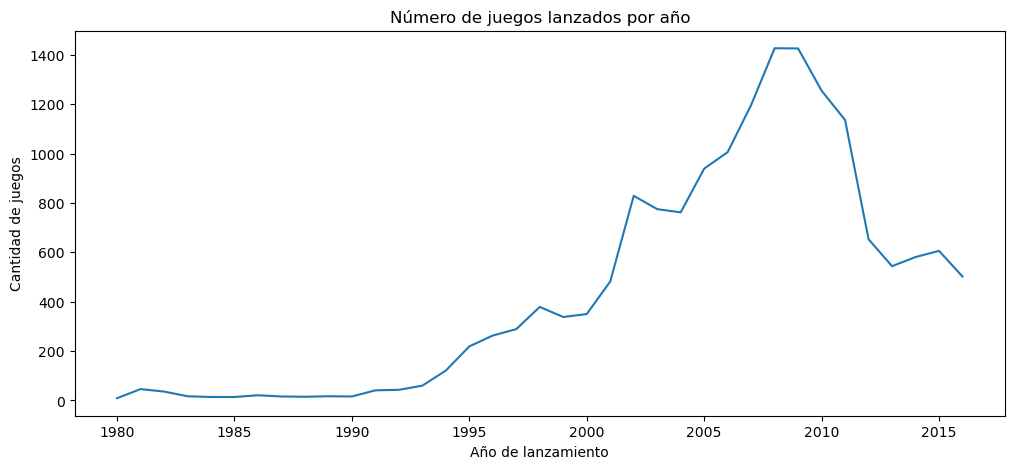

In [478]:
games_per_year = df[df['year_of_release'] > 1900].groupby('year_of_release')['name'].count() #Establezco una condicion, para eliminar los valores 0, que antes eran "null"

plt.figure(figsize=(12,5))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.show()


## 2.2 ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [479]:
# Filtrar datos válidos (sin años 0)
df_filtered = df[df['year_of_release'] > 1900]

# Agrupar por plataforma para ver su rango de años
platform_life = df_filtered.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calcular la duración de cada plataforma
platform_life['lifespan'] = platform_life['max'] - platform_life['min']

# Mostrar el resultado ordenado
platform_life = platform_life.sort_values(by='min')

# Calcular promedio de duración de vida
average_lifespan = platform_life['lifespan'].mean()
print("Duración promedio de las plataformas:", round(average_lifespan, 1), "años")

platform_life.head(10)

Duración promedio de las plataformas: 7.6 años


,min,max,lifespan
platform,,,
2600,1980,1989,9
NES,1983,1994,11
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
GEN,1990,1994,4
SNES,1990,1999,9
GG,1992,1992,0
SCD,1993,1994,1


## 2.3 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?



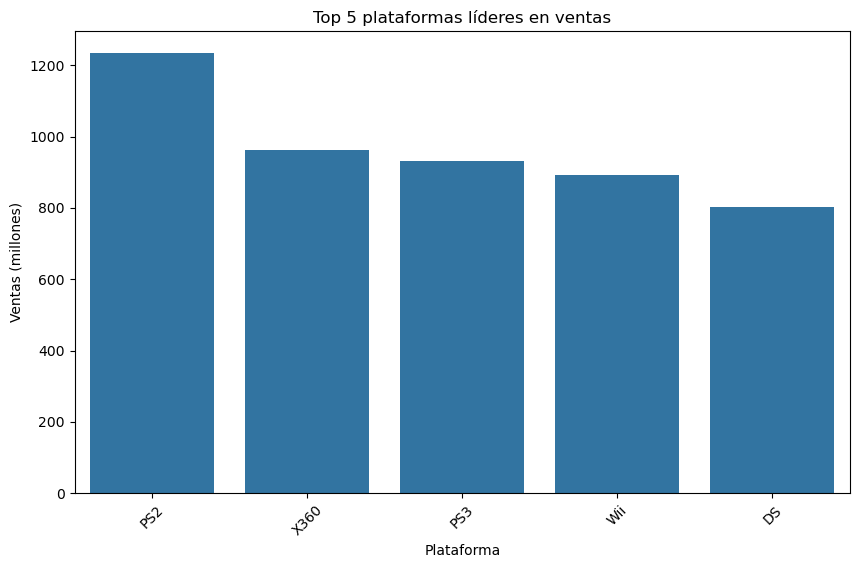

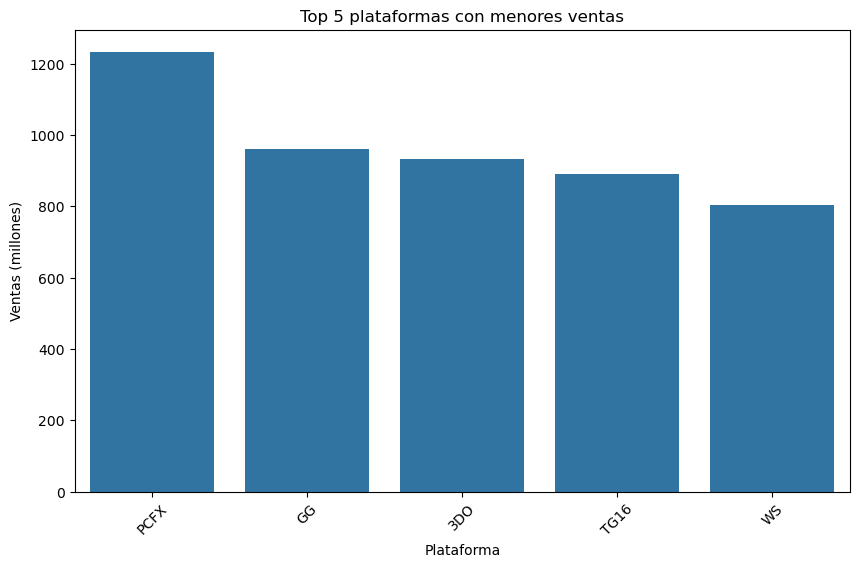

In [480]:
# Crear platform_sales agrupando por plataforma
platform_sales = df_filtered.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Visualizar las 5 plataformas con mayores ventas
plt.figure(figsize=(10,6))
sns.barplot(x=platform_sales.head(5).index, y=platform_sales.head(5).values)
plt.title('Top 5 plataformas líderes en ventas')
plt.ylabel('Ventas (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()

platform_less_sales = df_filtered.groupby('platform')['global_sales'].sum().sort_values(ascending=True)

# Visualizar las 5 plataformas con menores ventas
plt.figure(figsize=(10,6))
sns.barplot(x=platform_less_sales.head(5).index, y=platform_sales.head(5).values)
plt.title('Top 5 plataformas con menores ventas')
plt.ylabel('Ventas (millones)')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.show()

## 2.4 ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?



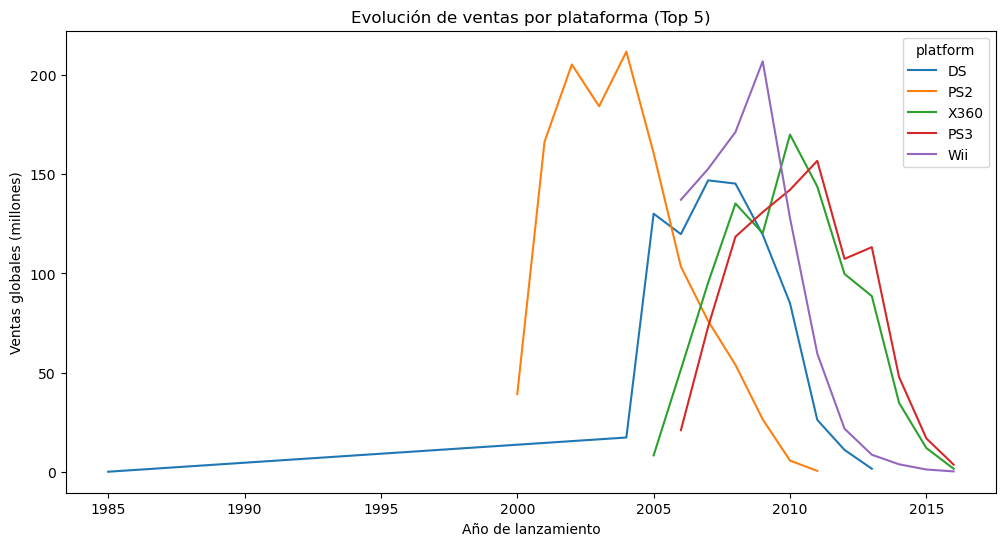

In [481]:
# Ventas por plataforma a lo largo del tiempo

top_platforms = platform_sales.head(5).index

# Filtrar años mayores a 1900
df_filtered = df[(df['year_of_release'] > 1900) & (df['year_of_release'].notna())]

# Agrupar por año y plataforma
platform_year_sales = (
    df_filtered[df_filtered['platform'].isin(top_platforms)]
    .groupby(['year_of_release', 'platform'])['global_sales']
    .sum()
    .reset_index()
)

# Gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_year_sales, x='year_of_release', y='global_sales', hue='platform')
plt.title('Evolución de ventas por plataforma (Top 5)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.show()


## Determinacion de periodom relevante 
Los datos más recientes (2013–2016) suelen representar la última generación de consolas,Tomaremos ese período para construir el modelo para 2017.

## 3.0 Correlación entre las reseñas y las ventas.

C:\Users\jose.hernandezv\AppData\Local\Temp\ipykernel_2024\1363799983.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  relevant_period = df.query('year_of_release >= 2013')


Juegos en período 2013–2016: 2233


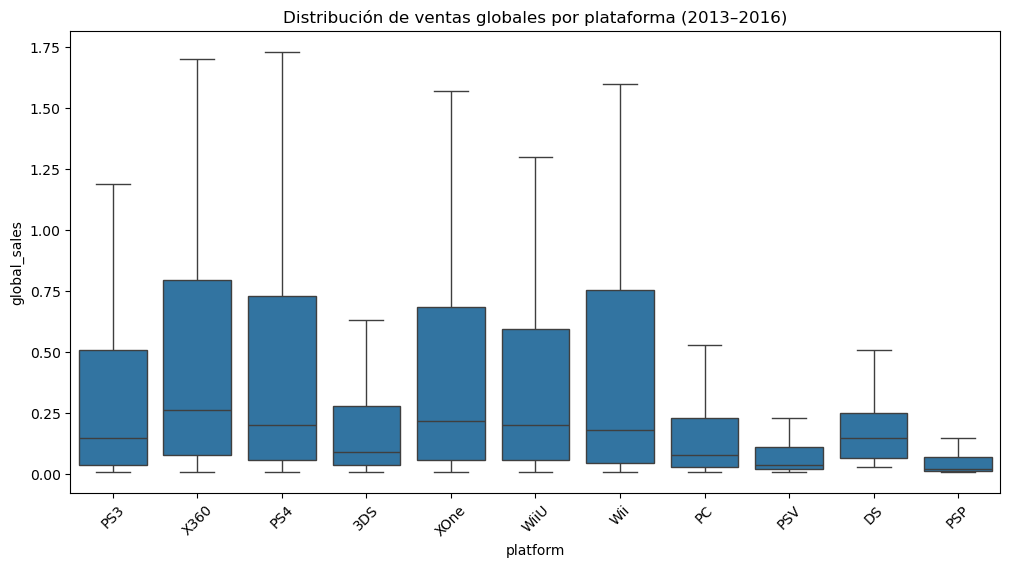

In [482]:
relevant_period = df.query('year_of_release >= 2013')
print("Juegos en período 2013–2016:", len(relevant_period))

# %%
# Ventas promedio por plataforma (2013-2016)
relevant_platforms = relevant_period.groupby('platform')['global_sales'].mean().sort_values(ascending=False)
relevant_platforms.head(10)

# %%
# Diagrama de caja (boxplot) para ventas por plataforma
plt.figure(figsize=(12,6))
sns.boxplot(data=relevant_period, x='platform', y='global_sales', showfliers = False)
plt.title('Distribución de ventas globales por plataforma (2013–2016)')
plt.xticks(rotation=45)
plt.show()

## 3.1 Comparacion de ventas de los mismos juegos, en diferentes plataformas

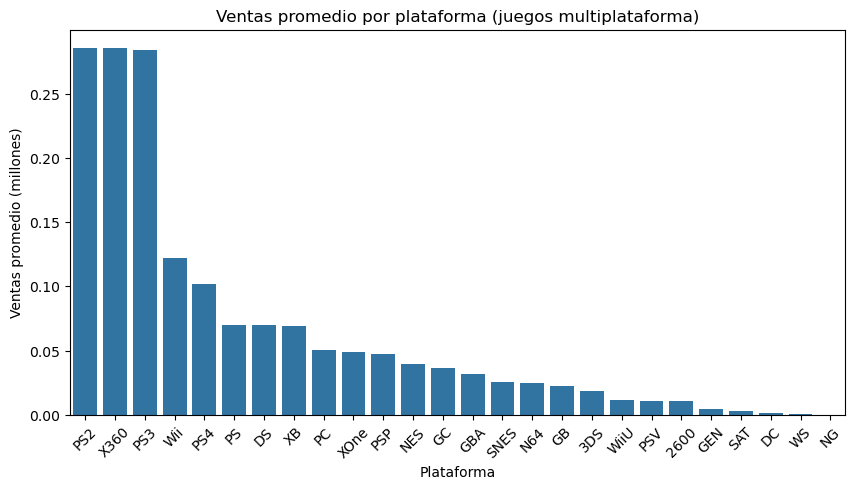

In [483]:
# Crear la columna de ventas globales

df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filtrar valores válidos
df_clean = df[(df['year_of_release'] > 1900) & (df['year_of_release'].notna())]
multi_platform_games = df_clean.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Crear tabla comparativa
sales_comparison = df_clean[df_clean['name'].isin(multi_platform_games)] \
    .pivot_table(index='name', columns='platform', values='global_sales', aggfunc='sum') \
    .fillna(0)

sales_comparison.head(10)
avg_sales = sales_comparison.mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_sales.index, y=avg_sales.values)
plt.title('Ventas promedio por plataforma (juegos multiplataforma)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas promedio (millones)')
plt.xticks(rotation=45)
plt.show()



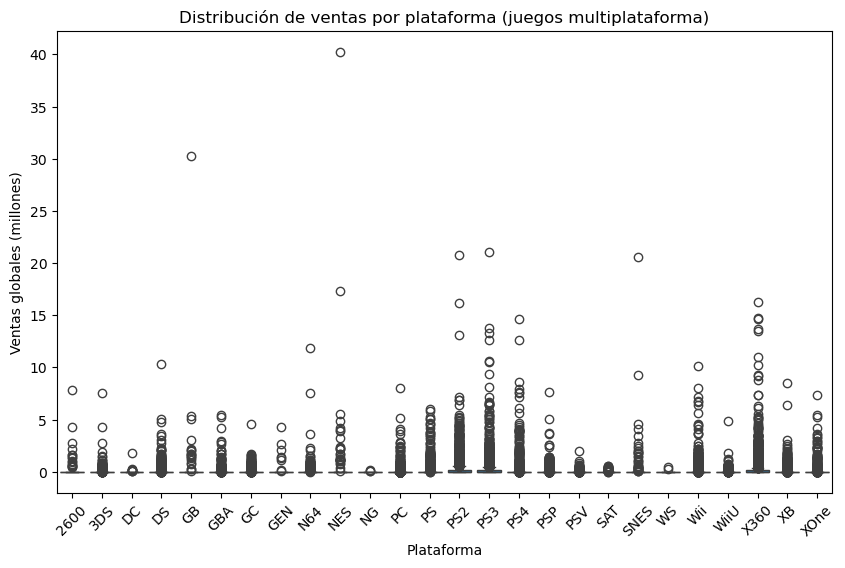

In [484]:
sales_melted = sales_comparison.melt(var_name='Plataforma', value_name='Ventas')

plt.figure(figsize=(10,6))
sns.boxplot(data=sales_melted, x='Plataforma', y='Ventas')
plt.title('Distribución de ventas por plataforma (juegos multiplataforma)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show()

## 3.2 ¿Cual es el genero mas vendido?

              count      sum      mean  median
genre                                         
Action         3307  1716.52  0.519057    0.19
Sports         2306  1309.67  0.567940    0.22
Shooter        1296  1041.36  0.803519    0.24
Role-Playing   1481   931.08  0.628683    0.18
Platform        878   825.55  0.940262    0.27
Misc           1721   790.29  0.459204    0.16
Racing         1226   723.49  0.590122    0.19
Fighting        837   442.66  0.528865    0.21
Simulation      857   387.96  0.452695    0.15
Puzzle          569   239.89  0.421599    0.10
Adventure      1293   233.33  0.180456    0.05
Strategy        673   172.57  0.256419    0.10


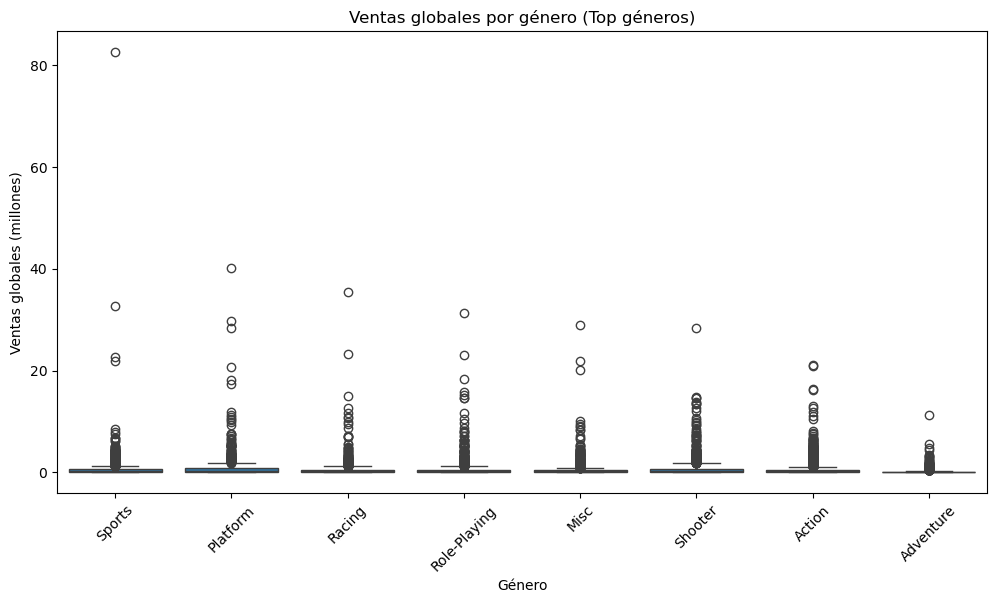

In [485]:
# Conteo y estadísticas de ventas por género
genre_stats = df_clean.groupby('genre')['global_sales'].agg(['count', 'sum', 'mean', 'median']).sort_values(by='sum', ascending=False)
print(genre_stats)
# Diagrama de caja por género
top_genres = df_clean['genre'].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean['genre'].isin(top_genres)],
            x='genre', y='global_sales')
plt.title('Ventas globales por género (Top géneros)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show()

## 3.2 Efecto de reseñas en ventas

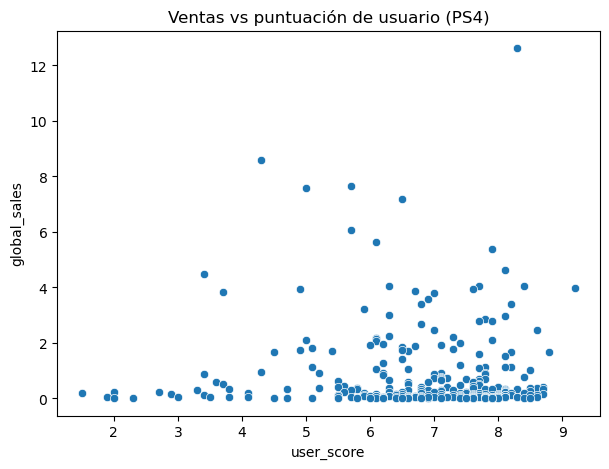

Correlación user_score / ventas: -0.03
Correlación critic_score / ventas: 0.41


In [486]:
# Elegimos una plataforma popular (ej. PS4)
ps4 = relevant_period[relevant_period['platform'] == 'PS4']

# Gráfico de dispersión (User Score vs Global Sales)
plt.figure(figsize=(7,5))
sns.scatterplot(data=ps4, x='user_score', y='global_sales')
plt.title('Ventas vs puntuación de usuario (PS4)')
plt.show()

# Correlación
corr_user = ps4['user_score'].corr(ps4['global_sales'])
corr_critic = ps4['critic_score'].corr(ps4['global_sales'])
print(f"Correlación user_score / ventas: {corr_user:.2f}")
print(f"Correlación critic_score / ventas: {corr_critic:.2f}")

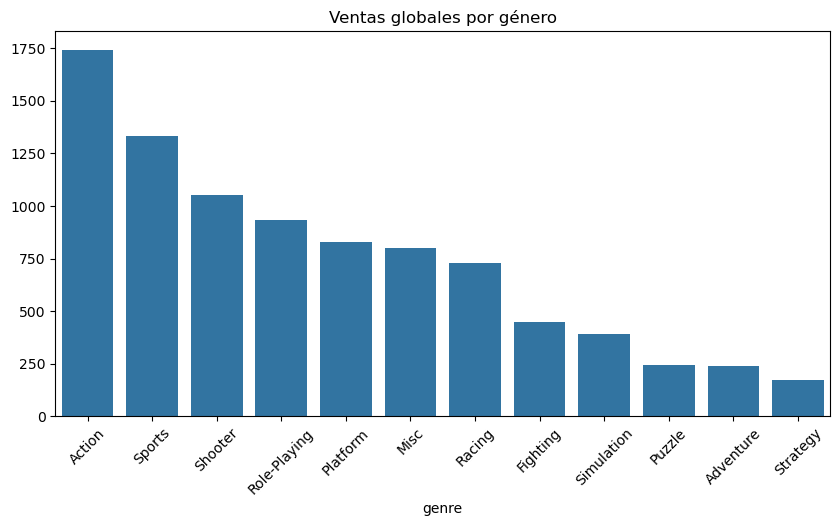

In [487]:
genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Ventas globales por género')
plt.xticks(rotation=45)
plt.show()

## 3.4 Creacion de perfiles para cada region

Top 5 plataformas en Norteamérica:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64 

Top 5 plataformas en Europa:
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64 

Top 5 plataformas en Japón:
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


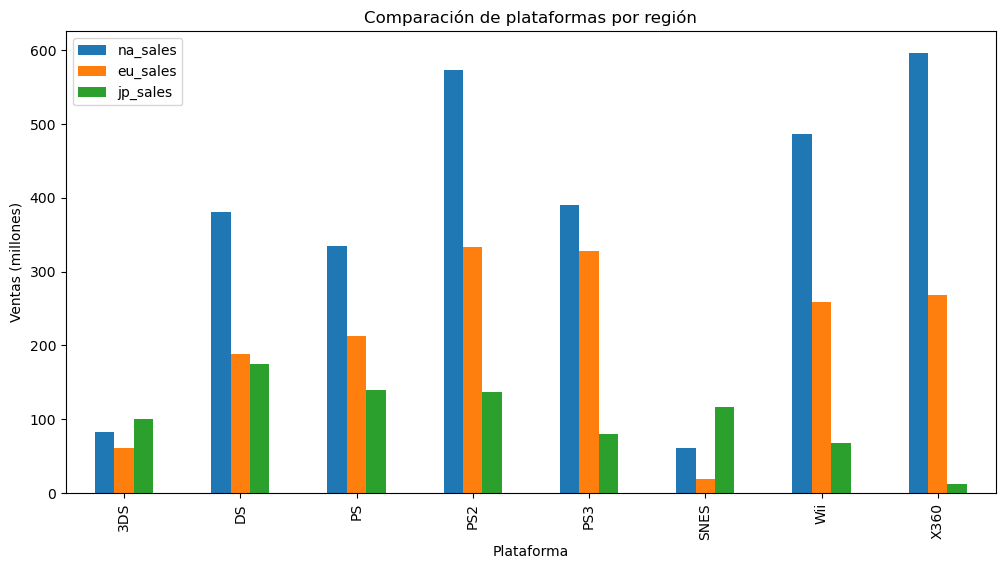

In [488]:
# Calcular ventas totales por plataforma en cada región
platform_region = df_clean.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtener el top 5 por región
top5_na = platform_region['na_sales'].sort_values(ascending=False).head(5)
top5_eu = platform_region['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = platform_region['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 plataformas en Norteamérica:\n", top5_na, "\n")
print("Top 5 plataformas en Europa:\n", top5_eu, "\n")
print("Top 5 plataformas en Japón:\n", top5_jp)

# Gráfico comparativo
platform_region.loc[top5_na.index.union(top5_eu.index).union(top5_jp.index)].plot(kind='bar', figsize=(12,6))
plt.title("Comparación de plataformas por región")
plt.xlabel("Plataforma")
plt.ylabel("Ventas (millones)")
plt.show()

## 4.0 Plataformas principales

Top 5 géneros en Norteamérica:
 genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64 

Top 5 géneros en Europa:
 genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64 

Top 5 géneros en Japón:
 genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


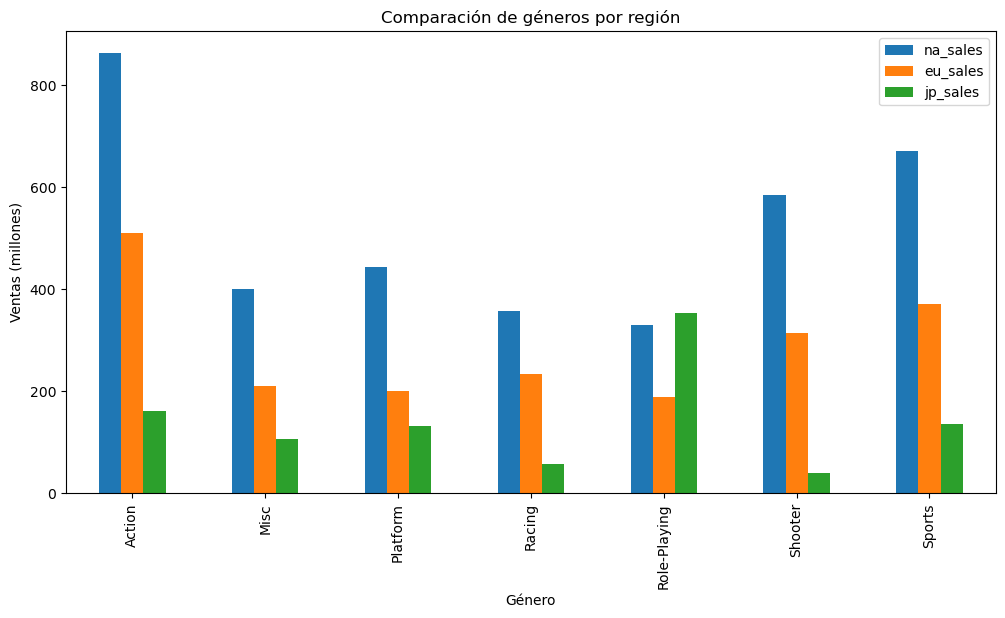

In [489]:

# Calcular ventas totales por género en cada región
genre_region = df_clean.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Top 5 géneros por región
top5_genre_na = genre_region['na_sales'].sort_values(ascending=False).head(5)
top5_genre_eu = genre_region['eu_sales'].sort_values(ascending=False).head(5)
top5_genre_jp = genre_region['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica:\n", top5_genre_na, "\n")
print("Top 5 géneros en Europa:\n", top5_genre_eu, "\n")
print("Top 5 géneros en Japón:\n", top5_genre_jp)

# Gráfico comparativo - USAR .loc
genre_region.loc[top5_genre_na.index.union(top5_genre_eu.index).union(top5_genre_jp.index)] \
    .plot(kind='bar', figsize=(12,6))
plt.title("Comparación de géneros por región")
plt.xlabel("Género")
plt.ylabel("Ventas (millones)")
plt.show()

Ventas promedio por clasificación ESRB:
         na_sales  eu_sales  jp_sales
rating                              
AO      1.260000  0.610000  0.000000
E       0.324978  0.179513  0.050487
E10+    0.248026  0.131622  0.028859
EC      0.191250  0.013750  0.000000
K-A     0.853333  0.090000  0.486667
M       0.483652  0.312500  0.041393
RP      0.000000  0.030000  0.000000
T       0.257349  0.145194  0.051876


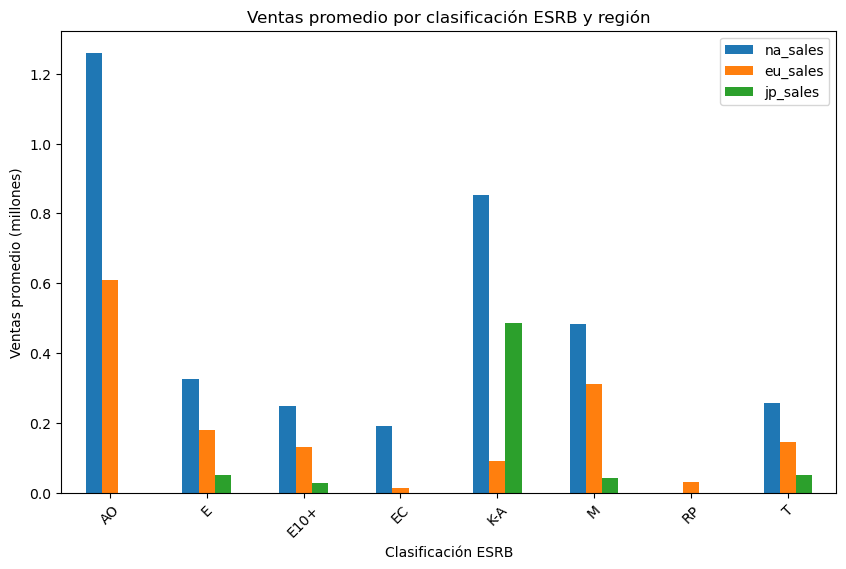

In [490]:
# Ventas promedio por clasificación ESRB y región
rating_region = df_clean.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().dropna()

print("Ventas promedio por clasificación ESRB:\n", rating_region)

# Gráfico de barras
rating_region.plot(kind='bar', figsize=(10,6))
plt.title("Ventas promedio por clasificación ESRB y región")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas promedio (millones)")
plt.xticks(rotation=45)
plt.show()

## 4.1 ¿Las clasificaciones ESRB, afectan a las ventas en regiones individuales?

        na_sales           eu_sales          jp_sales        
            mean      sum      mean     sum      mean     sum
rating                                                       
E       0.324978  1274.24  0.179513  703.87  0.050487  197.96
T       0.257349   747.60  0.145194  421.79  0.051876  150.70
M       0.483652   742.89  0.312500  480.00  0.041393   63.58
E10+    0.248026   345.50  0.131622  183.35  0.028859   40.20
K-A     0.853333     2.56  0.090000    0.27  0.486667    1.46
EC      0.191250     1.53  0.013750    0.11  0.000000    0.00
AO      1.260000     1.26  0.610000    0.61  0.000000    0.00
RP      0.000000     0.00  0.030000    0.03  0.000000    0.00


<Figure size 1000x600 with 0 Axes>

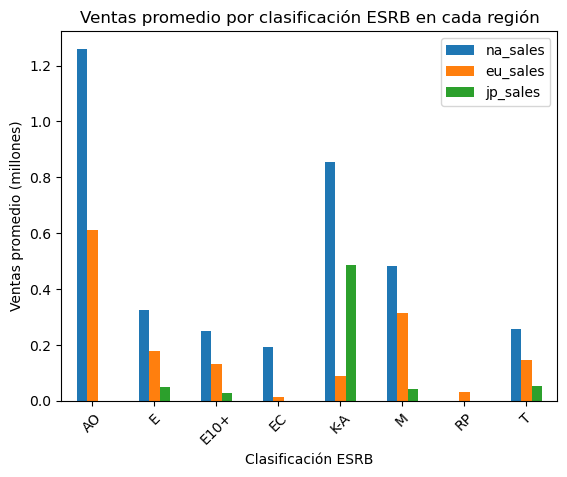

Correlación rating-ventas (NA): 0.03
Correlación rating-ventas (EU): 0.05
Correlación rating-ventas (JP): -0.01


In [491]:
# Agrupar por clasificación ESRB y calcular ventas promedio y totales por región
esrb_sales = (
    df_clean.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .agg(['mean', 'sum'])
    .dropna()
    .sort_values(('na_sales', 'sum'), ascending=False)
)

print(esrb_sales)
# Ventas promedio por región
esrb_mean = df_clean.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().dropna()

plt.figure(figsize=(10,6))
esrb_mean.plot(kind='bar')
plt.title('Ventas promedio por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas promedio (millones)')
plt.xticks(rotation=45)
plt.show()
# Crear copia explícita para evitar SettingWithCopyWarning
df_clean = df_clean.copy()

# Asignar valores numéricos a las clasificaciones ESRB
rating_map = {'EC': 1, 'E': 2, 'E10+': 3, 'T': 4, 'M': 5, 'AO': 6, 'RP': None}
df_clean.loc[:, 'rating_num'] = df_clean['rating'].map(rating_map)

# Calcular correlaciones por región
corr_na = df_clean[['rating_num', 'na_sales']].corr().iloc[0,1]
corr_eu = df_clean[['rating_num', 'eu_sales']].corr().iloc[0,1]
corr_jp = df_clean[['rating_num', 'jp_sales']].corr().iloc[0,1]

print(f"Correlación rating-ventas (NA): {corr_na:.2f}")
print(f"Correlación rating-ventas (EU): {corr_eu:.2f}")
print(f"Correlación rating-ventas (JP): {corr_jp:.2f}")



## 5.0 Prueba de hipotesis
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [492]:
# Filtrar plataformas y eliminar nulls
df_filtered = df[df['platform'].isin(['Xbox One', 'PC'])]
df_filtered = df_filtered[df_filtered['user_score'].notnull()]

# Separar muestras
xbox_scores = df_filtered[df_filtered['platform'] == 'Xbox One']['user_score']
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score']

# Test t para muestras independientes
t_stat, p_value = ttest_ind(xbox_scores, pc_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos H₀: No hay evidencia de que las calificaciones promedio sean diferentes.")


T-statistic: nan
P-value: nan
No rechazamos H₀: No hay evidencia de que las calificaciones promedio sean diferentes.


c:\Users\jose.hernandezv\AppData\Local\anaconda3_\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [493]:
df_filtered['platform'].unique()

array(['PC'], dtype=object)

Las calificaciones promedio de los usuario para los generos de accion y deportes son diferentes



In [494]:
# Filtrar géneros y eliminar nulls
df_genres = df[df['genre'].isin(['Action', 'Sports'])]
df_genres = df_genres[df_genres['user_score'].notnull()]

# Separar muestras
action_scores = df_genres[df_genres['genre'] == 'Action']['user_score']
sports_scores = df_genres[df_genres['genre'] == 'Sports']['user_score']

# Test t para muestras independientes
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos H₀: No hay evidencia de que las calificaciones promedio sean diferentes.")


T-statistic: 1.57746791633354
P-value: 0.11483818791498288
No rechazamos H₀: No hay evidencia de que las calificaciones promedio sean diferentes.


## 6.0 Conclusiones

Explicacion de hipotesis: Xbox One vs PC

Hipótesis nula (H₀): “Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.”

Esto significa que no hay diferencia significativa entre los promedios de los dos grupos.

Se asume como verdadera al inicio para poder probarla.

Hipótesis alternativa (H₁): “Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.”

Esto significa que sí hay una diferencia significativa entre los promedios.

Géneros Acción vs Deportes

H₀: Las calificaciones promedio de los usuarios para Acción y Deportes son iguales.

H₁: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.

El tipo de hipótesis alternativa que elegimos es bilateral, porque solo queremos detectar si hay diferencia, sin importar la dirección.

CONCLUSION GENERAL Ventas por género y plataforma: Los géneros más vendidos en Norteamérica y Europa son Action, Sports y Shooter, mientras que en Japón predominan los Role-Playing y Action. Las plataformas más populares varían según la región: Norteamérica: X360, PS2, Wii Europa: PS2, PS3, X360 Japón: DS, PS, PS2 Esto refleja diferencias culturales y de preferencia de hardware entre regiones. Ventas promedio por clasificación ESRB:

Los juegos para adultos (AO, M) tienen las ventas más altas en Norteamérica. Juegos E (Everyone) y E10+ muestran ventas moderadas en todas las regiones. Esto indica que los juegos con clasificación más estricta no necesariamente tienen menores ventas en algunas regiones (como Norteamérica).

Pruebas de hipótesis sobre calificaciones de usuarios Xbox One vs PC: p-value = NaN (posiblemente por falta de datos), no se puede rechazar H₀. Géneros Action vs Sports: p-value ≈ 0.115 > 0.05 → No rechazamos H₀. Conclusión: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios difieran entre Action y Sports. En general, aunque las ventas varían según plataforma, género y región, las calificaciones promedio de los usuarios no muestran diferencias estadísticamente significativas entre los grupos evaluados.

